# Overview

Contains the steps for building a classifier that ignores context and looks only at the text features. 

In [6]:
from ClassifierFunctions import *
import os

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
data_dir = 'SavedData'

In [8]:
data = pickle.load(open(os.path.join(data_dir, 'processed_data.pkl'), 'rb'))
features_dict = pickle.load(open(os.path.join(data_dir, 'features_dict.pkl'), 'rb'))

In [9]:
# Using a pipeline so I can add more preprocessing later
param_grid = {'vect__ngram_range': [(1,1), (1,2), (1, 3)], 
              'vect__max_df':[.1, .3, .5, .7, 1], # handles the necessity of checking stopwords
              }
pipeline = [('vect', TfidfVectorizer(encoding='unicode')),
            ('clf', MultinomialNB())]
model = Pipeline(pipeline)


SCORES:

Average Accuracy: 0.898268398268
Average Precision:  0.866090333042
Average Recall: 0.980740740741
Average F1:  0.919310679663

Pipeline Parameters:
{'vect__max_df': 0.5, 'vect__ngram_range': (1, 1)}



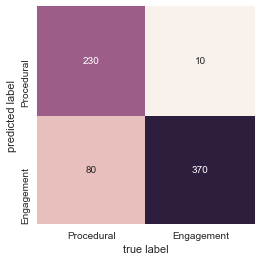

In [10]:
X, y = data['text'], data.binary_label

grid = evaluate_model(model, param_grid, X, y)
clf_text = grid.best_estimator_

This worked amazingly well, but I want to look at how a weighted voting classifier will perform.

In [14]:
pickle.dump(clf_text, open(os.path.join(data_dir, 'clf_text.p'), 'wb'))

## Next


SCORES:

Average Accuracy: 0.802597402597
Average Precision:  0.769444421159
Average Recall: 0.95037037037
Average F1:  0.849961313331

Pipeline Parameters:
{'vect__max_df': 0.3, 'vect__ngram_range': (1, 2)}



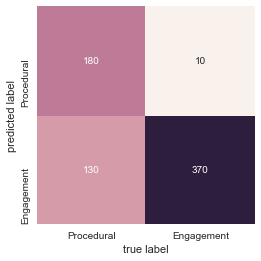

In [12]:
X, y = data['text_next'], data.binary_label

grid = evaluate_model(model, param_grid, X, y)
clf_text_next = grid.best_estimator_

In [15]:
pickle.dump(clf_text_next, open(os.path.join(data_dir, 'clf_text_next.p'), 'wb'))

## Previous


SCORES:

Average Accuracy: 0.747881066302
Average Precision:  0.72325861293
Average Recall: 0.92962962963
Average F1:  0.812832104044

Pipeline Parameters:
{'vect__max_df': 0.1, 'vect__ngram_range': (1, 1)}



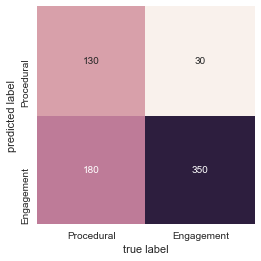

In [16]:
X, y = data['text_prev'], data.binary_label

grid = evaluate_model(model, param_grid, X, y)
clf_text_prev = grid.best_estimator_

In [17]:
pickle.dump(clf_text_prev, open(os.path.join(data_dir, 'clf_text_prev.p'), 'wb'))